# Nama : Farras Nur Haidar Ramadhan
# Email : farrasnurhaidar04@gmail.com
# username Dicoding : farrasnhr

# Library yang digunakan

Menyiapkan beberapa library guna menunjang pengerjaan proyek. Berikut library yang akan digunakan pada proyek ini:

In [ ]:
# Importing libraries
import os
import ast
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras import layers


# Data Loading

Proses ini dilakukan pengambilan dataset dari Kaggle dari *setup* *username* dan *key* dalam bentuk `json`, kemudian melakukan pengunduhan *resource*, dan data yang telah diunduh dalam bentuk zip akan dilakukan ekstraksi.

## Mengunduh resource

Membuat variabel untuk menampung informasi terkait kredensial akun kaggle yang berisi username dan key untuk mendownload resource berupa dataset di Kaggle, berikutnya memulai mengunduh dataset dan berkas yang telah diunduh dilakukan ekstraksi berkas

In [ ]:
# Installasi Kaggle
!pip install kaggle

# Membuat direktori .kaggle dan mengatur kredensial
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Mengisi username dan API key
username = "farrasramadhan"
key = "6efe077df4ef11eb390e33c88f8a7c00"

# Membuat file kaggle.json
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    f.write(f'{{"username":"{username}","key":"{key}"}}')

# Mengubah permission file kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Mengunduh dataset
!kaggle datasets download -d rounakbanik/the-movies-dataset

# Mengekstrak dataset
!unzip the-movies-dataset.zip -d movie

# Data Understanding - Movie

## Informasi Dataset

Menginisiasi variabel untuk path ke berkas csv

In [ ]:
credits = pd.read_csv('movie/credits.csv')
keywords = pd.read_csv('movie/keywords.csv')
links = pd.read_csv('movie/links.csv')
links_small = pd.read_csv('movie/links_small.csv')
movies_metadata = pd.read_csv('movie/movies_metadata.csv')
ratings = pd.read_csv('movie/ratings.csv')
ratings_small = pd.read_csv('movie/ratings_small.csv')

C:\Users\farra\AppData\Local\Temp\ipykernel_24376\131265586.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('movie/movies_metadata.csv')


### credits

Melihat data sekilas setiap berkas csv

In [ ]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


Melihat informasi jumlah data, tipe data setiap fitur

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


   Informasi diatas menunjukkan terdapat 45476 data dengan tipe data `int64` sebanyak satu kolom, dan empat lainnya bertipe data `object`. Dengan uraian setiap fitur sebagai berikut:<br>
   - `cast`: Berisi informasi tentang pemeran film,
   - `crew`: Berisi informasi tentang kru film, termasuk sutradara, penulis naskah, dan lain-lain,
   - `id`: Berisi ID *unique* untuk setiap film yang sesuai dengan id di file movies_metadata.csv.

### keywords

In [ ]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [ ]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


Informasi di atas menunjukkan terdapat 46419 data dengan tipe data `int64` sebanyak satu kolom, dan satu bertipe data `object`. Dengan uraian setiap fitur sebagai berikut:<br>

- `id`: Berisi ID *unique* untuk setiap film yang sesuai dengan `id` di file `movies_metadata.csv`,
- `keywords`: Berisi daftar kata kunci (keywords) yang relevan dengan film.

### links

In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


Informasi di atas menunjukkan terdapat 45843 data dengan tipe data `float64` sebanyak satu kolom, dan dua lainnya bertipe data `int64`. Dengan uraian setiap fitur sebagai berikut:<br>
- `movieId`: Berisi ID *unique* film yang sesuai dengan `movieId` di file `ratings.csv`,
- `imdbId`: Berisi ID film di IMDb, digunakan untuk menghubungkan data dengan sumber luar, seperti situs IMDb,
- `tmdbId`: Berisi ID film di TMDb (The Movie Database), juga digunakan untuk menghubungkan data dengan TMDb.

### links_small

In [ ]:
links_small

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [ ]:
links_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


Tabel diatas menunjukkan terdapat 9125 data dengan tipe data `float64` sebanyak satu kolom, dan dua lainnya bertipe data `int64`. Dengan uraian setiap fitur sebagai berikut:<br>
- `movieId`: Berisi ID *unique* film yang sesuai dengan `movieId` di file `ratings.csv`,
- `imdbId`: Berisi ID film di IMDb, digunakan untuk menghubungkan data dengan sumber luar, seperti situs IMDb,
- `tmdbId`: Berisi ID film di TMDb (The Movie Database), juga digunakan untuk menghubungkan data dengan TMDb.

### movies_metadata

In [ ]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Tabel di atas menunjukkan terdapat 45466 data dengan tipe data `float64` sebanyak empat kolom, dan 20 lainnya bertipe data `int64`. Dengan uraian setiap fitur sebagai berikut:<br>
- `adult`: Berisi apakah film ini untuk dewasa atau tidak,
- `belongs_to_collection`: Berisi informasi tentang koleksi film,
- `budget`: Berisi anggaran pembuatan film,
- `genres`: Berisi daftar genre film,
- `homepage`: Berisi URL situs resmi film,
- `id`: Berisi ID *unique* untuk setiap film, digunakan untuk menghubungkan dengan file lain,
- `imdb_id`: Berisi ID *unique* film di IMDb,
- `original_language`: Berisi bahasa asli film,
- `original_title`: Berisi judul asli film,
- `overview`: Berisi sinopsis atau deskripsi singkat tentang film,
- `popularity`: Berisi skor popularitas film,
- `poster_path`: Berisi *path* atau URL untuk poster film,
- `production_companies`: Berisi daftar perusahaan produksi yang terlibat dalam pembuatan film,
- `production_countries`: Berisi daftar negara tempat produksi film,
- `release_date`: Berisi tanggal rilis film,
- `revenue`: Berisi pendapatan yang dihasilkan oleh film,
- `runtime`: Berisi durasi film dalam menit,
- `spoken_languages`: Berisi daftar bahasa yang digunakan dalam film,
- `status`: Berisi status rilis film,
- `tagline`: Berisi *tagline* atau slogan film,
- `title`: Berisi judul film,
- `video`: Berisi apakah film ini memiliki video terkait,
- `vote_average`: Berisi rata-rata *rating* yang diberikan oleh pengguna,
- `vote_count`: Berisi jumlah total *vote* atau *rating* yang diberikan oleh pengguna.

### ratings

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


Informasi di atas menunjukkan terdapat 26024289 data dengan tipe data `float64` sebanyak satu kolom, dan tiga lainnya bertipe data `int64`. Dengan uraian setiap fitur sebagai berikut:<br>
- `userId`: Berisi ID *unique* untuk setiap pengguna,
- `movieId`: Berisi ID *unique* untuk setiap film yang sesuai dengan `movieId` di `links.csv`,
- `rating`: Berisi rating yang diberikan oleh pengguna untuk film tersebut,
- `timestamp`: Berisi waktu saat *rating* diberikan.

### ratings_small

In [ ]:
ratings_small

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
ratings_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Informasi di atas menunjukkan terdapat 100004 data dengan tipe data `float64` sebanyak satu kolom, dan tiga lainnya bertipe data `int64`. Dengan uraian setiap fitur sebagai berikut:<br>
- `userId`: Berisi ID *unique* untuk setiap pengguna,
- `movieId`: Berisi ID *unique* untuk setiap film yang sesuai dengan `movieId` di `links.csv`,
- `rating`: Berisi *rating* yang diberikan oleh pengguna untuk film tersebut,
- `timestamp`: Berisi waktu saat *rating* diberikan.

## EDA

### credits

In [ ]:
credits = pd.read_csv("movie/credits.csv")

In [ ]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

Output diatas menunjukkan tidak adanya *missing values* pada `credits`.

Melakukan ekstraksi pada fitur `cast` dan `crew` untuk mendapatkan cast utama dan juga sutradara.

In [ ]:
# Fungsi untuk mengekstrak nama cast yang unique
def get_unique_cast(credits):
    all_cast = set()

    for cast_list in credits['cast']:
        # Ubah string JSON menjadi list
        try:
            cast_data = ast.literal_eval(cast_list)
            for person in cast_data:
                all_cast.add(person['name'])
        except (ValueError, SyntaxError):
            continue

    return all_cast

# Mendapatkan cast yang unique
unique_cast = get_unique_cast(credits)
print(f"Jumlah cast unique: {len(unique_cast)}")
print("Beberapa nama cast:", list(unique_cast)[:10])

Jumlah cast unik: 202747
Contoh nama cast unik: ['Adrianne Palicki', 'Helma Vandenberg', 'Anne Carlisle', 'Enzo Marcelli', 'Guillermo Battaglia', 'Adriano Celentano', 'Ina Sofie Brodahl', 'Andre Lindveldt', 'Arron Shiver', 'Keir Knight']


Output di atas menujukkan bahwa jumlah cast *unique* di dataset berjumlah 202747 data *unique*.

In [ ]:
# Fungsi untuk mengekstrak nama crew (terutama sutradara / director) yang unique
def get_unique_directors(credits):
    all_directors = set()

    for crew_list in credits['crew']:
        # Ubah string JSON menjadi list
        try:
            crew_data = ast.literal_eval(crew_list)
            for person in crew_data:
                # Ambil nama jika orang tersebut adalah sutradara / director
                if person['job'] == 'Director':
                    all_directors.add(person['name'])
        except (ValueError, SyntaxError):
            continue

    return all_directors

# Mendapatkan sutradara yang unique
unique_directors = get_unique_directors(credits)
print(f"Jumlah sutradara unique: {len(unique_directors)}")
print("Beberapa nama sutradara / director:", list(unique_directors)[:10])

Jumlah sutradara unique: 19740
Beberapa nama sutradara / director: ['Josef Hader', 'Júlíus Kemp', 'James W. Griffiths', 'Sue Bourne', 'Walter Doniger', 'Adriano Celentano', 'Chris Alexander', 'John Cassavetes', 'Alan Cumming', 'Patrice Toye']


Output di atas menujukkan bahwa jumlah sutradara / director *unique* di dataset berjumlah 19740 data *unique*.

Menghitung cast utama yang paling sering muncul di film dan menghitung cast utama yang paling sedikit muncul di film.

In [ ]:
# Fungsi untuk mengekstrak semua nama aktor dari kolom 'cast' dan menghitung frekuensinya
def get_cast_frequency(credits):
    all_cast = []

    for cast_list in credits['cast']:
        # Mengubah string JSON menjadi list
        try:
            cast_data = ast.literal_eval(cast_list)
            for person in cast_data:
                all_cast.append(person['name'])
        except (ValueError, SyntaxError):
            continue

    # Menghitung frekuensi kemunculan setiap aktor
    cast_counts = Counter(all_cast)
    return cast_counts

# Get frekuensi kemunculan setiap aktor
cast_frequency = get_cast_frequency(credits)

# Get aktor yang paling sering muncul dan yang paling jarang muncul
most_common_cast = cast_frequency.most_common(10)  # 10 aktor paling sering muncul
least_common_cast = [actor for actor in cast_frequency.items() if actor[1] == 1]  # Aktor yang hanya muncul sekali

# Tampilkan hasil
print("Cast yang paling sering muncul:")
for name, count in most_common_cast:
    print(f"{name}: {count} kali")

print("\nCast yang paling jarang muncul (muncul sekali):")
for name, count in least_common_cast[:10]:
    print(f"{name}: {count} kali")


Cast yang paling sering muncul:
Bess Flowers: 241 kali
Christopher Lee: 148 kali
John Wayne: 125 kali
Samuel L. Jackson: 123 kali
Gérard Depardieu: 110 kali
Michael Caine: 110 kali
Donald Sutherland: 109 kali
John Carradine: 109 kali
Jackie Chan: 108 kali
Frank Welker: 107 kali

Cast yang paling jarang muncul (muncul sekali):
Brandon Obray: 1 kali
Cyrus Thiedeke: 1 kali
Gary Joseph Thorup: 1 kali
Leonard Zola: 1 kali
Robyn Driscoll: 1 kali
Sarah Gilson: 1 kali
Florica Vlad: 1 kali
June Lion: 1 kali
Brenda Lockmuller: 1 kali
Brad Baldridge: 1 kali


Output di atas menunjukkan `cast` yang sering muncul dan munculnya hanya sekali dapat diuraikan bahwa Bess Flowers tercatat sebagai cast yang paling sering muncul dengan total 241 kali, diikuti oleh Christopher Lee sebanyak 148 kali dan John Wayne sebanyak 125 kali. Cast lain yang sering muncul mencakup Samuel L. Jackson (123 kali), Gérard Depardieu (110 kali), Michael Caine (110 kali), Donald Sutherland (109 kali), John Carradine (109 kali), Jackie Chan (108 kali), dan Frank Welker (107 kali). Di sisi lain, ada beberapa cast yang hanya muncul satu kali, termasuk Brandon Obray, Cyrus Thiedeke, Gary Joseph Thorup, Leonard Zola, Robyn Driscoll, Sarah Gilson, Florica Vlad, June Lion, Brenda Lockmuller, dan Brad Baldridge

Menghitung jumlah cast terbanyak dan sedikit pada film

In [ ]:
# Fungsi untuk menghitung jumlah cast per movie
def count_cast_per_movie(credits):
    cast_counts = []

    for index, row in credits.iterrows():
        try:
            # Mengubah string JSON menjadi list of dictionaries
            cast_list = ast.literal_eval(row['cast'])
            # Hitung jumlah cast untuk setiap movie
            cast_count = len(cast_list)
        except (ValueError, SyntaxError):
            cast_count = 0  # Jika parsing gagal, set jumlah cast menjadi 0

        cast_counts.append((row['id'], cast_count))

    return cast_counts

# Hitung jumlah cast untuk setiap film
cast_counts = count_cast_per_movie(credits)

# Convert hasil ke DataFrame untuk analisis lebih lanjut
cast_counts_df = pd.DataFrame(cast_counts, columns=['movie_id', 'cast_count'])

# Film dengan cast terbanyak dan tersedikit
most_cast_movie = cast_counts_df.loc[cast_counts_df['cast_count'].idxmax()]
least_cast_movie = cast_counts_df.loc[cast_counts_df['cast_count'].idxmin()]

# Tampilkan hasil
print("Film dengan cast terbanyak:")
print(f"Movie ID: {most_cast_movie['movie_id']}, Jumlah cast: {most_cast_movie['cast_count']}")

print("\nFilm dengan cast tersedikit:")
print(f"Movie ID: {least_cast_movie['movie_id']}, Jumlah cast: {least_cast_movie['cast_count']}")

Film dengan cast terbanyak:
Movie ID: 2897, Jumlah cast: 313

Film dengan cast tersedikit:
Movie ID: 124639, Jumlah cast: 0


Output di atas menujukkan bahwa film dengan jumlah `cast` terbanyak adalah film dengan Movie ID 2897, yang memiliki total 313 `cast`, sedangkan film dengan jumlah `cast` tersedikit adalah film dengan Movie ID 124639, yang tidak memiliki `cast` sama sekali.

Menghitung jumlah crew terbanyak dan sedikit di film.

In [ ]:
# Fungsi untuk menghitung jumlah crew per movie
def count_crew_per_movie(credits):
    crew_counts = []

    for index, row in credits.iterrows():
        try:
            # Mengubah string JSON menjadi list of dictionaries
            crew_list = ast.literal_eval(row['crew'])
            # Hitung jumlah crew untuk setiap movie
            crew_count = len(crew_list)
        except (ValueError, SyntaxError):
            crew_count = 0  # Jika parsing gagal, set jumlah crew menjadi 0

        crew_counts.append((row['id'], crew_count))

    return crew_counts

# Hitung jumlah crew untuk setiap film
crew_counts = count_crew_per_movie(credits)

# Convert hasil ke DataFrame untuk analisis lebih lanjut
crew_counts_df = pd.DataFrame(crew_counts, columns=['movie_id', 'crew_count'])

# Film dengan crew terbanyak dan tersedikit
most_crew_movie = crew_counts_df.loc[crew_counts_df['crew_count'].idxmax()]
least_crew_movie = crew_counts_df.loc[crew_counts_df['crew_count'].idxmin()]

# Tampilkan hasil
print("Film dengan crew terbanyak:")
print(f"Movie ID: {most_crew_movie['movie_id']}, Jumlah crew: {most_crew_movie['crew_count']}")

print("\nFilm dengan crew tersedikit:")
print(f"Movie ID: {least_crew_movie['movie_id']}, Jumlah crew: {least_crew_movie['crew_count']}")

Film dengan crew terbanyak:
Movie ID: 135397, Jumlah crew: 435

Film dengan crew tersedikit:
Movie ID: 56088, Jumlah crew: 0


Output di atas menunjukkan `crew` terbanyak yaitu pada Movie ID: 135397 dengan jumlah `crew` sebanyak 435 `crew`, dan yang paling sedikit yaitu Movie ID: 56088 dengan jumlah `crew` 0.

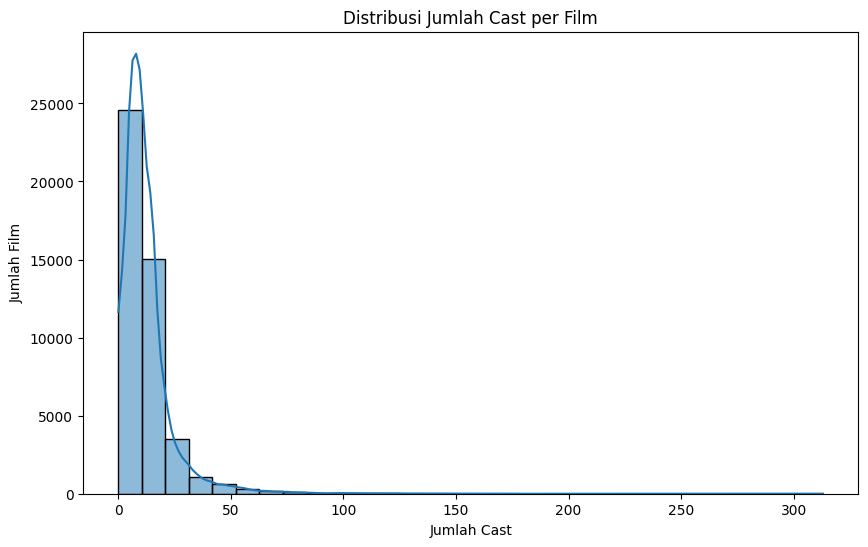

In [ ]:
# Buat dataframe untuk jumlah cast per film
cast_counts_df = pd.DataFrame(cast_counts, columns=['movie_id', 'cast_count'])

# Plot distribusi jumlah cast per film
plt.figure(figsize=(10, 6))
sns.histplot(cast_counts_df['cast_count'], bins=30, kde=True)
plt.title("Distribusi Jumlah Cast per Film")
plt.xlabel("Jumlah Cast")
plt.ylabel("Jumlah Film")
plt.show()


Gambar di atas menunjukkan bahwa sebagian besar film memiliki jumlah cast yang rendah, dengan puncak di sekitar 10-20 cast per film, dan hanya sedikit film yang memiliki cast dalam jumlah besar hingga lebih dari 100 orang, menandakan distribusi yang positif skewed dengan mayoritas film berada di kisaran 0-50 cast.

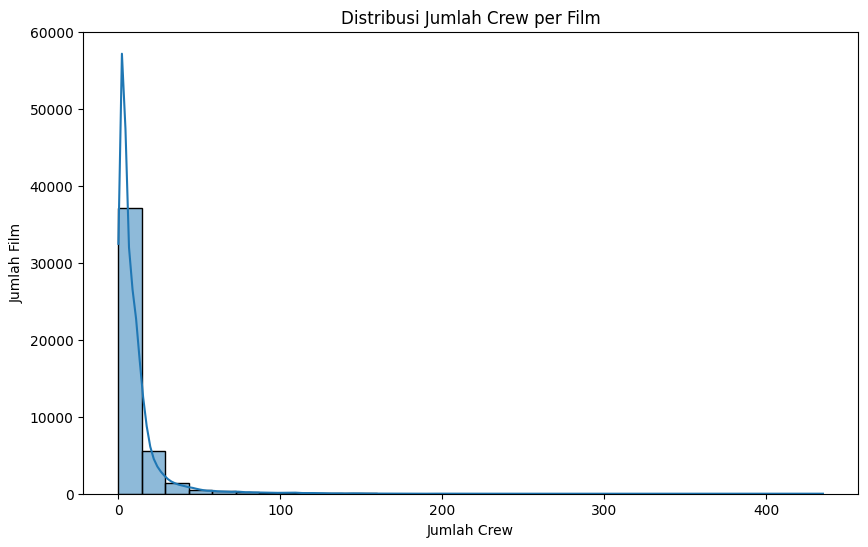

In [ ]:
# Plot distribusi jumlah crew per film
plt.figure(figsize=(10, 6))
sns.histplot(crew_counts_df['crew_count'], bins=30, kde=True)
plt.title("Distribusi Jumlah Crew per Film")
plt.xlabel("Jumlah Crew")
plt.ylabel("Jumlah Film")
plt.show()


Gambar di atas menunjukkan bahwa mayoritas film memiliki jumlah crew yang rendah, terutama dalam rentang 0-50 anggota, dengan beberapa pengecualian yang mencapai lebih dari 100 hingga 400 anggota, memperlihatkan distribusi yang sangat positif skewed dengan sebagian besar film dikerjakan oleh tim yang relatif kecil.

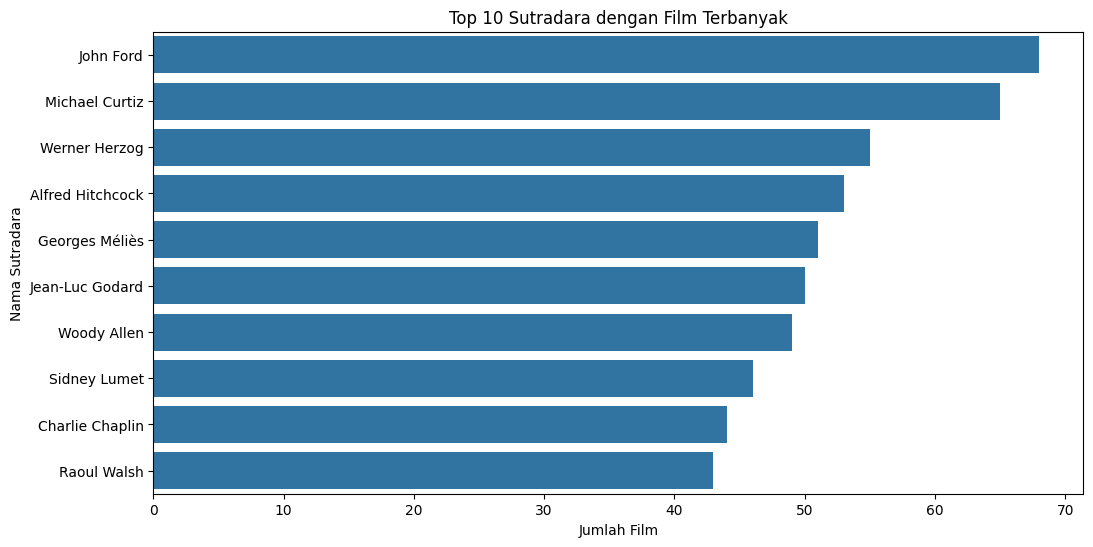

In [ ]:
# Ekstraksi data sutradara dari kolom crew
directors = []

for index, row in credits.iterrows():
    crew_list = ast.literal_eval(row['crew'])
    for crew_member in crew_list:
        if crew_member['job'] == 'Director':
            directors.append(crew_member['name'])

# Buat DataFrame dari daftar sutradara dan hitung frekuensi
directors_df = pd.DataFrame(directors, columns=['director'])
top_directors = directors_df['director'].value_counts().head(10)

# Plot Top 10 Sutradara
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Sutradara dengan Film Terbanyak")
plt.xlabel("Jumlah Film")
plt.ylabel("Nama Sutradara")
plt.show()


Gambar di atas menunjukkan 10 sutradara dengan film terbanyak.

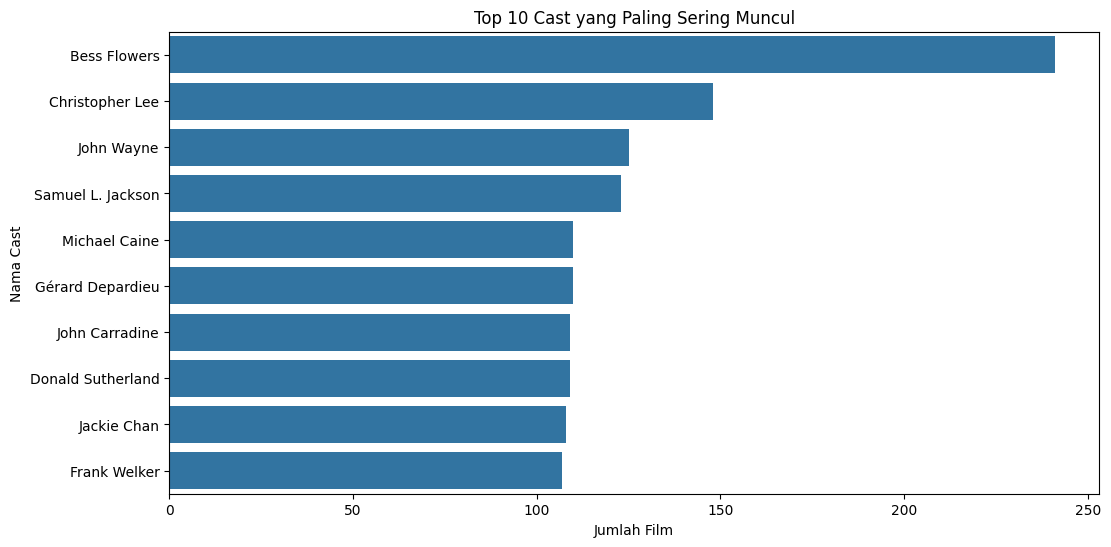

In [ ]:
# Ekstraksi data dari kolom cast
actors = []

for index, row in credits.iterrows():
    cast_list = ast.literal_eval(row['cast'])
    for cast_member in cast_list:
        actors.append(cast_member['name'])

# Buat DataFrame dari daftar cast dan hitung frekuensi
actors_df = pd.DataFrame(actors, columns=['actor'])
top_actors = actors_df['actor'].value_counts().head(10)

# Plot Top 10 cast
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title("Top 10 Cast yang Paling Sering Muncul")
plt.xlabel("Jumlah Film")
plt.ylabel("Nama Cast")
plt.show()


Gambar di atas menunjukkan 10 cast teratas yang paling sering muncul di film.

### keywords

In [ ]:
keywords = pd.read_csv("movie/keywords.csv")

In [ ]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [ ]:
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

Output diatas menunjukkan tidak adanya *missing values* pada `keywords`.

In [ ]:
# Mengumpulkan semua keywords dalam satu list
all_keywords = []
for item in keywords['keywords']:
    keyword_list = ast.literal_eval(item)
    for keyword in keyword_list:
        all_keywords.append(keyword['name'])

# Mendapatkan keywords Unique
unique_keywords = set(all_keywords)
print(f"Jumlah Keywords Unique: {len(unique_keywords)}")
print("Contoh Keywords Unique:", list(unique_keywords)[:10])

Jumlah Keywords Unique: 19956
Contoh Keywords Unique: ['catfishing', 'snooker', 'reference to elvis presley', 'braggart', 'onsen', 'prussia', 'fetishism', 'tour bus', 'klingon', 'injection']


Output di atas menunjukkan bahwa terdapat keywords *unique* pada dataset.

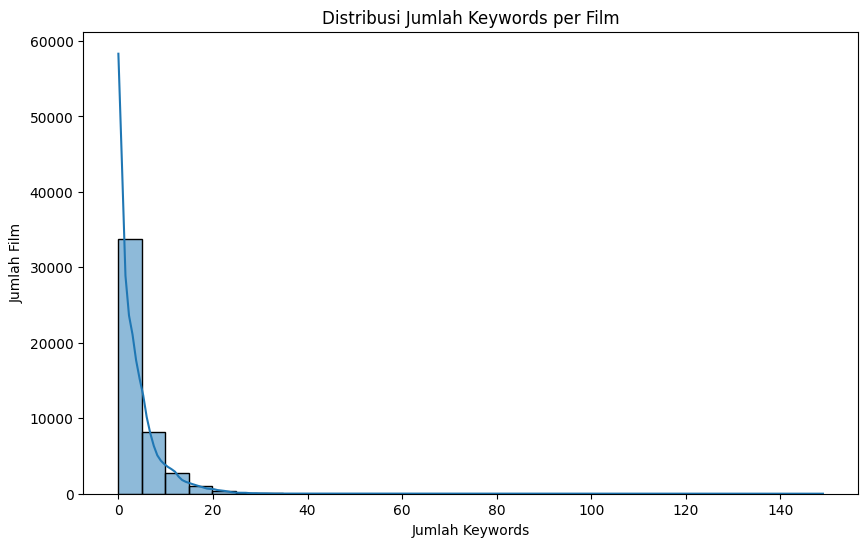

In [ ]:
# Menghitung jumlah keywords per film
keywords['keywords_count'] = keywords['keywords'].apply(lambda x: len(ast.literal_eval(x)))

plt.figure(figsize=(10, 6))
sns.histplot(keywords['keywords_count'], bins=30, kde=True)
plt.title("Distribusi Jumlah Keywords per Film")
plt.xlabel("Jumlah Keywords")
plt.ylabel("Jumlah Film")
plt.show()


Gambar di atas menunjukkan bahwa kebanyakan film hanya memiliki sedikit kata kunci, biasanya antara 0 hingga 5. Hanya sedikit sekali film yang punya banyak kata kunci, dan semakin banyak kata kunci, semakin sedikit jumlah filmnya.

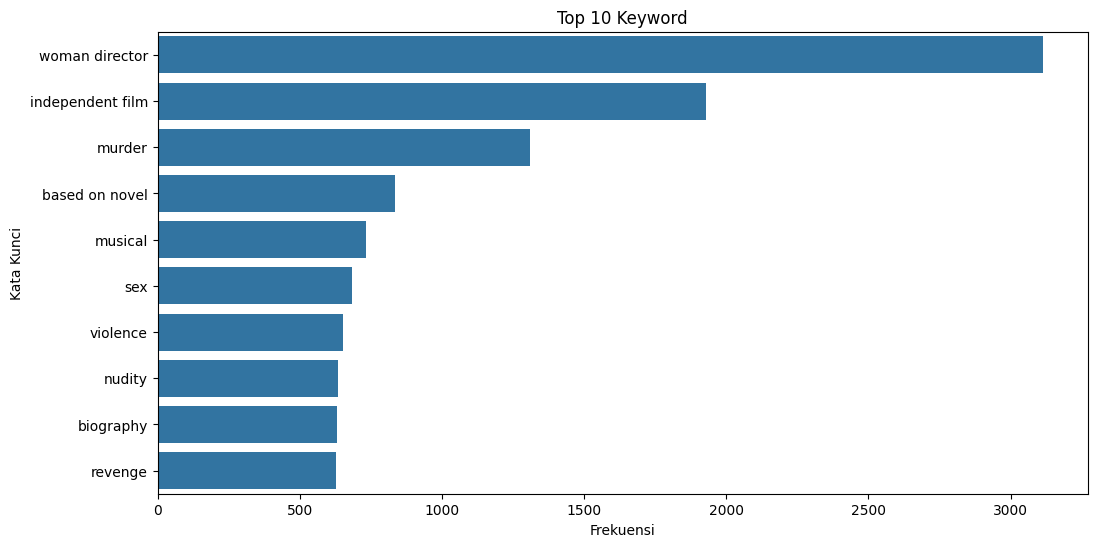

In [ ]:
# Mengumpulkan semua kata kunci
all_keywords = []
for item in keywords['keywords']:
    keyword_list = ast.literal_eval(item)
    for keyword in keyword_list:
        all_keywords.append(keyword['name'])

# Menghitung frekuensi kata kunci
keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(10)

# Mengubah menjadi dataframe untuk visualisasi
top_keywords_df = pd.DataFrame(top_keywords, columns=['keyword', 'count'])

# Plot Top 10 keywords
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='keyword', data=top_keywords_df)
plt.title("Top 10 Keyword")
plt.xlabel("Frekuensi")
plt.ylabel("Kata Kunci")
plt.show()


Gambar di atas menunjukkan sepuluh kata kunci yang paling sering digunakan dalam film, dengan "woman director" sebagai kata kunci yang paling banyak muncul, diikuti oleh "independent film" dan "murder." Kata kunci ini mengindikasikan tema atau elemen yang sering diangkat dalam berbagai film, seperti sutradara perempuan, film independen, dan tema pembunuhan, yang semuanya memiliki frekuensi tinggi dibandingkan dengan kata kunci lain dalam daftar.

### links

In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [ ]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

Output di atas menunjukkan terdapat *missing values* pada fitur `tmdbId` sebanyak 219 data.

In [ ]:
print("Jumlah movieId unik:", links['movieId'].nunique())
print("Jumlah imdbId unik:", links['imdbId'].nunique())
print("Jumlah tmdbId unik:", links['tmdbId'].nunique())


Jumlah movieId unik: 45843
Jumlah imdbId unik: 45843
Jumlah tmdbId unik: 45594


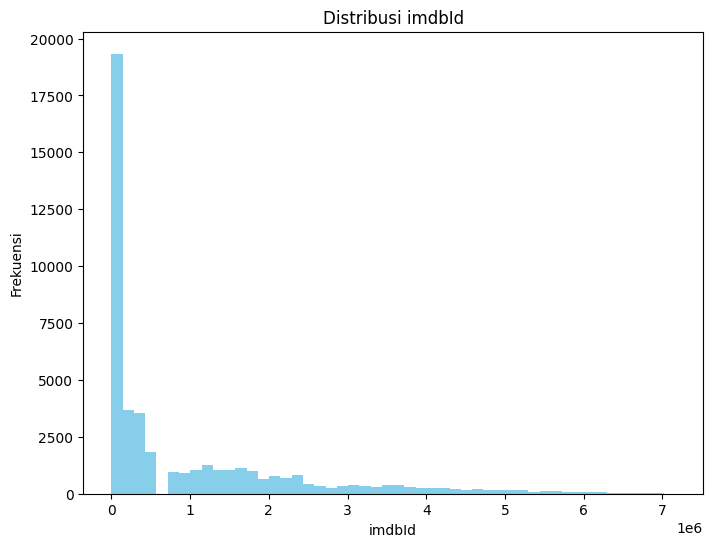

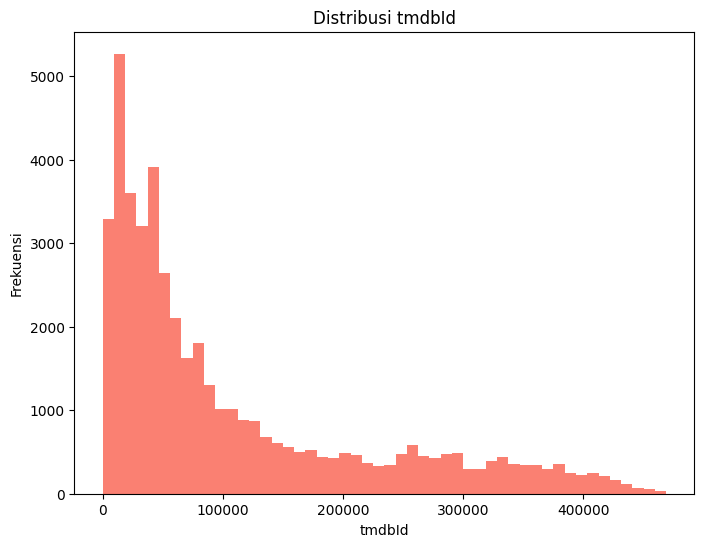

In [ ]:
# Distribusi imdbId
plt.figure(figsize=(8, 6))
plt.hist(links['imdbId'].dropna(), bins=50, color='skyblue')
plt.title("Distribusi imdbId")
plt.xlabel("imdbId")
plt.ylabel("Frekuensi")
plt.show()

# Distribusi tmdbId
plt.figure(figsize=(8, 6))
plt.hist(links['tmdbId'].dropna(), bins=50, color='salmon')
plt.title("Distribusi tmdbId")
plt.xlabel("tmdbId")
plt.ylabel("Frekuensi")
plt.show()

Gambar pertama di atas menunjukkan bahwa sebagian besar film memiliki nilai imdbId yang relatif kecil, dengan sedikit film yang memiliki nilai imdbId yang lebih tinggi, yang mengindikasikan distribusi yang sangat tidak merata di mana mayoritas film berada di kisaran rendah.

Gambar kedua di atas menunjukka pola serupa untuk tmdbId, dengan banyak film yang memiliki nilai tmdbId rendah dan hanya sedikit film yang memiliki nilai tmdbId tinggi, yang menunjukkan distribusi yang juga tidak merata di antara film-film tersebut.

### links_small

In [ ]:
links_small

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [ ]:
links_small.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

Output di atas menunjukkan terdapat *missing values* pada fitur `tmdbId` sebanyak 13 data.

In [ ]:
print("Jumlah movieId unik:", links_small['movieId'].nunique())
print("Jumlah imdbId unik:", links_small['imdbId'].nunique())
print("Jumlah tmdbId unik:", links_small['tmdbId'].nunique())


Jumlah movieId unik: 9125
Jumlah imdbId unik: 9125
Jumlah tmdbId unik: 9112


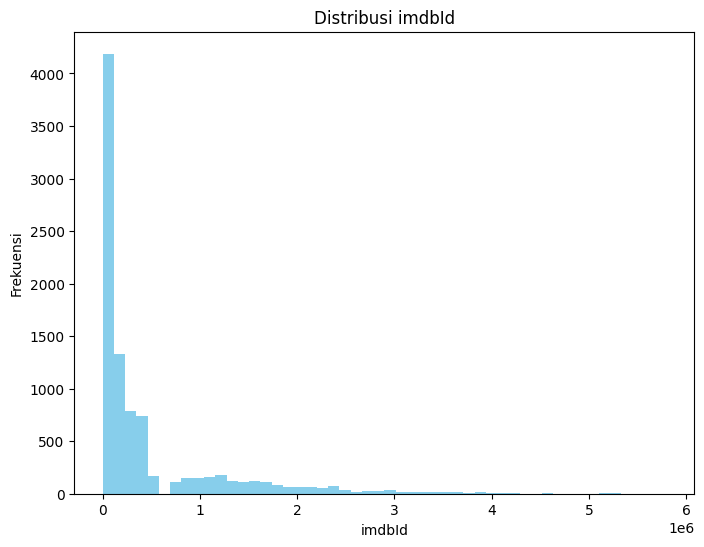

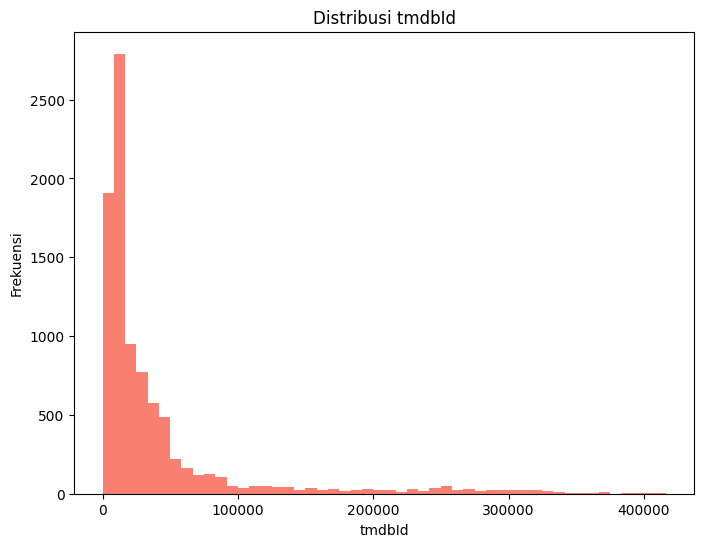

In [ ]:
# Distribusi imdbId
plt.figure(figsize=(8, 6))
plt.hist(links_small['imdbId'].dropna(), bins=50, color='skyblue')
plt.title("Distribusi imdbId")
plt.xlabel("imdbId")
plt.ylabel("Frekuensi")
plt.show()

# Distribusi tmdbId
plt.figure(figsize=(8, 6))
plt.hist(links_small['tmdbId'].dropna(), bins=50, color='salmon')
plt.title("Distribusi tmdbId")
plt.xlabel("tmdbId")
plt.ylabel("Frekuensi")
plt.show()


Gambar pertama di atas menunjukkan distribusi imdbId, kita melihat bahwa sebagian besar film memiliki nilai imdbId yang rendah, dengan frekuensi tertinggi berkumpul di bagian kiri grafik.

Gambar kedua di atas menunjukkan distribusi tmdbId, pola yang mirip terlihat, di mana mayoritas tmdbId berjumlah rendah dan beberapa jumlah lebih tinggi muncul semakin jarang.

### movies_metadata

In [ ]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
movies_metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Informasi di atas menunjukkan adanya *missing values* pada beberapa fitur, yaitu `belongs_to_collection` (40972), `homepage` (37684), `imdb_id` (17), `original_language` (11), `overview` (954), `popularity` (5), `poster_path` (386), `production_companies` (3), `production_countries` (3), `release_date` (87), `revenue` (6), `runtime` (263), `spoken_languages` (6), `status` (87), `tagline` (25054), `title` (6), `video` (6), `vote_average` (6), dan `vote_count` (6).

In [ ]:
# Ensure the genres column is parsed correctly
movies_metadata['genres'] = movies_metadata['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Flatten the genres list and extract unique genre names
genres_list = {genre['name'] for genres in movies_metadata['genres'] if isinstance(genres, list) for genre in genres}

# Count unique genres
unique_genres_count = len(genres_list)

print(f"Berikut genre unik: {unique_genres_count}")

Berikut genre unik: 32


Output diatas menujukkan ditemukan sebanyak 32 genre unik

In [ ]:
# Convert the set to a sorted list and join the genres with commas
unique_genres = ", ".join(sorted(genres_list))

print(f"Berikut hasilnya: {unique_genres}")

Berikut hasilnya: Action, Adventure, Animation, Aniplex, BROSTA TV, Carousel Productions, Comedy, Crime, Documentary, Drama, Family, Fantasy, Foreign, GoHands, History, Horror, Mardock Scramble Production Committee, Music, Mystery, Odyssey Media, Pulser Productions, Rogue State, Romance, Science Fiction, Sentai Filmworks, TV Movie, Telescene Film Group Productions, The Cartel, Thriller, Vision View Entertainment, War, Western


C:\Users\farra\AppData\Local\Temp\ipykernel_12404\3616244106.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='viridis')


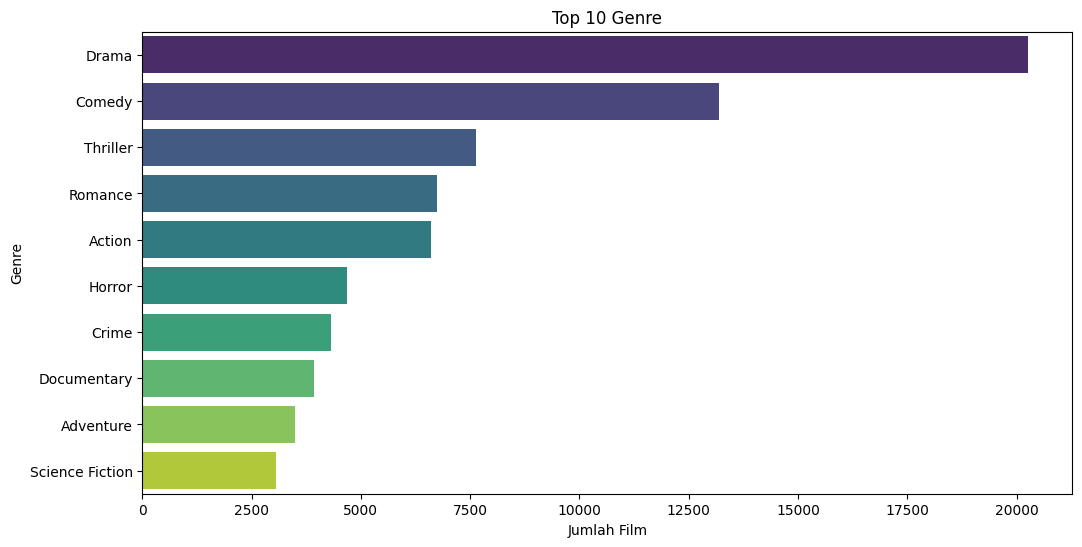

In [ ]:
# Mengonversi kolom genres menjadi list
movies_metadata['genres'] = movies_metadata['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
genres_list = [genre['name'] for sublist in movies_metadata['genres'] for genre in sublist]
top_genres = Counter(genres_list).most_common(10)

# Visualisasi top genres
genres, counts = zip(*top_genres)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(genres), palette='viridis')
plt.title('Top 10 Genre')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()


Gambar di atas menunjukkan genre film yang paling populer. Drama dan Komedi merupakan genre yang paling sering muncul, diikuti oleh Thriller, Romance, dan Action. Genre-genre ini menunjukkan preferensi umum dalam produksi film.

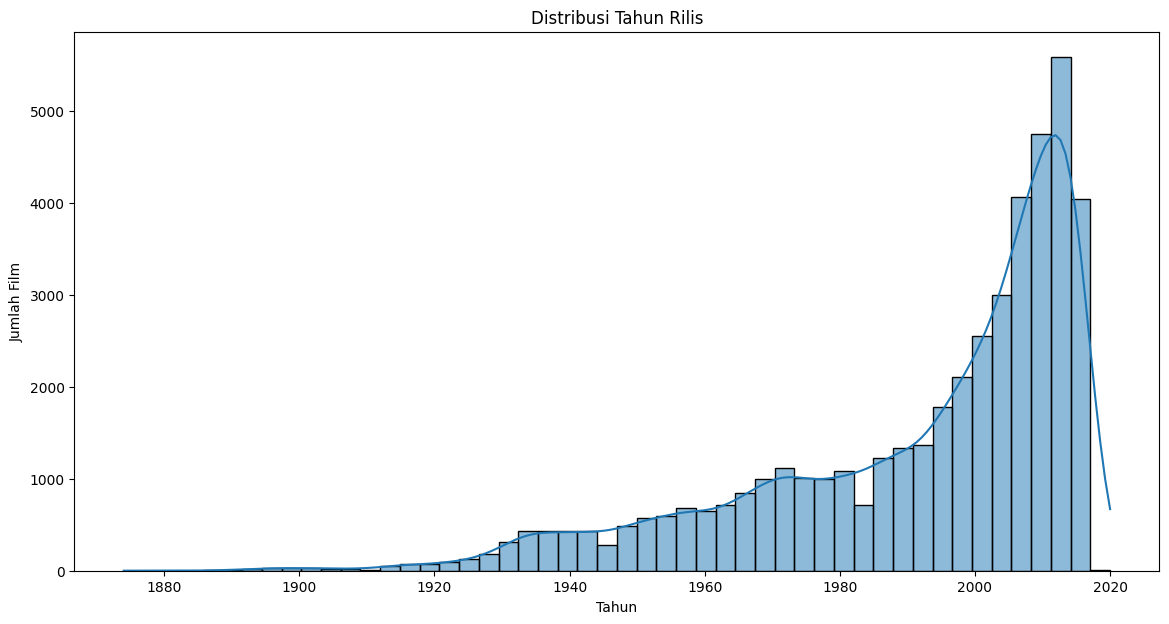

In [ ]:
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year

plt.figure(figsize=(14, 7))
sns.histplot(movies_metadata['release_year'].dropna(), bins=50, kde=True)
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Film')
plt.show()


Gambar di atas menunjukkan jumlah film yang dirilis setiap tahun dari akhir abad ke-19 hingga awal abad ke-21. Terlihat ada peningkatan jumlah film yang signifikan sejak pertengahan abad ke-20, mencapai puncaknya di tahun 2000-an, lalu sedikit menurun setelahnya.

C:\Users\farra\AppData\Local\Temp\ipykernel_12404\3744113717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_languages.values, y=top_10_languages.index, palette="viridis")


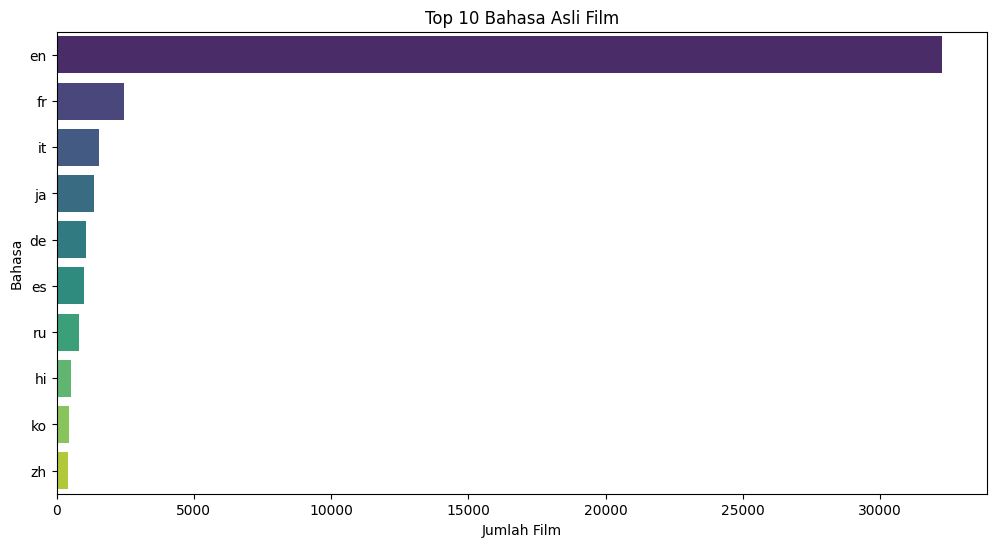

In [ ]:
# Menghitung 10 bahasa asli film teratas
top_10_languages = movies_metadata['original_language'].value_counts().head(10)

# Membuat plot untuk Top 10 bahasa asli
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_languages.values, y=top_10_languages.index, palette="viridis")
plt.title('Top 10 Bahasa Asli Film')
plt.xlabel('Jumlah Film')
plt.ylabel('Bahasa')
plt.show()


Gambar di atas menunjukkan bahasa asli yang paling umum digunakan dalam film. Bahasa Inggris (ditampilkan sebagai "en") mendominasi dengan jumlah yang jauh lebih besar dibandingkan bahasa lainnya seperti Prancis, Italia, dan Jepang.

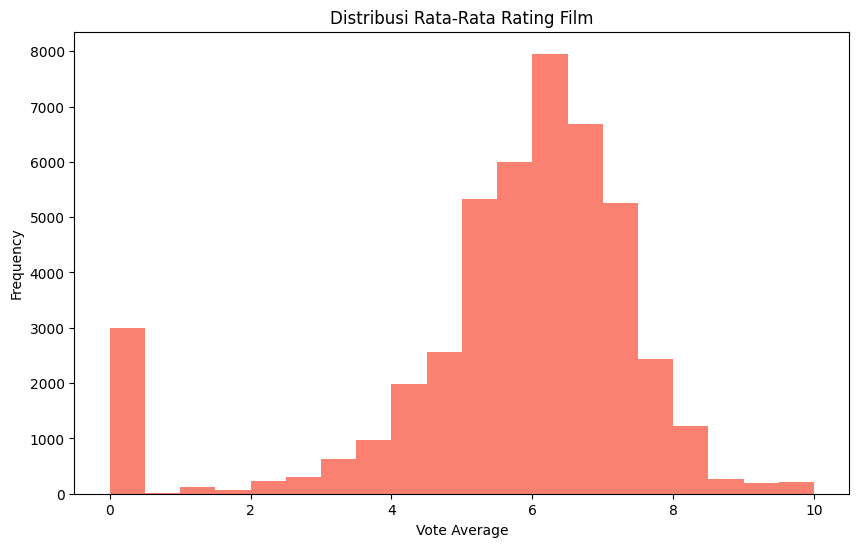

In [ ]:
# Plot distribusi rating rata-rata
plt.figure(figsize=(10, 6))
plt.hist(movies_metadata['vote_average'].dropna(), bins=20, color='salmon')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribusi Rata-Rata Rating Film')
plt.show()


Gambar di atas menunjukkan bagaimana distribusi nilai rating rata-rata yang diberikan untuk film. Sebagian besar film mendapatkan rating rata-rata sekitar 5 hingga 7, dengan sedikit yang memiliki nilai mendekati 0 atau sempurna di 10.

In [ ]:
movies_metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Output dari `movies_metadata.describe()` menunjukkan ringkasan statistik dasar untuk beberapa kolom numerik dalam dataset `movies_metadata`, yaitu `revenue`, `runtime`, `vote_average`, dan `vote_count`.

- **Count**: Jumlah data yang tidak kosong untuk setiap kolom.
  - `revenue`: 45,460
  - `runtime`: 45,203
  - `vote_average`: 45,460
  - `vote_count`: 45,460
- **Mean**: Rata-rata nilai dari setiap kolom.
  - `revenue`: 11,209,350
  - `runtime`: 94.13 menit
  - `vote_average`: 5.62
  - `vote_count`: 109.90
- **Std (Standar Deviasi)**: Penyebaran nilai dalam setiap kolom, menunjukkan variasi data.
  - `revenue`: 64,332,250
  - `runtime`: 38.41
  - `vote_average`: 1.92
  - `vote_count`: 491.31
- **Min**: Nilai minimum dalam setiap kolom.
  - `revenue`, `runtime`, dan `vote_average` memiliki nilai minimum 0.
- **25% (Kuartil Pertama)**: 25% dari data memiliki nilai di bawah ini.
  - `runtime`: 85 menit
  - `vote_average`: 5.0
  - `vote_count`: 3 vote
- **50% (Median)**: Nilai tengah dari data.
  - `runtime`: 95 menit
  - `vote_average`: 6.0
  - `vote_count`: 10 vote
- **75% (Kuartil Ketiga)**: 75% dari data memiliki nilai di bawah ini.
  - `runtime`: 107 menit
  - `vote_average`: 6.8
  - `vote_count`: 34 vote
- **Max**: Nilai maksimum di setiap kolom.
  - `revenue`: 2,787,965,000
  - `runtime`: 1256 menit
  - `vote_average`: 10
  - `vote_count`: 14,075 vote


### ratings

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
# Memeriksa apakah ada missing values di setiap kolom
ratings.isnull().sum()


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Output diatas menujukkan tidak adanya *missing values* pada `ratings`.

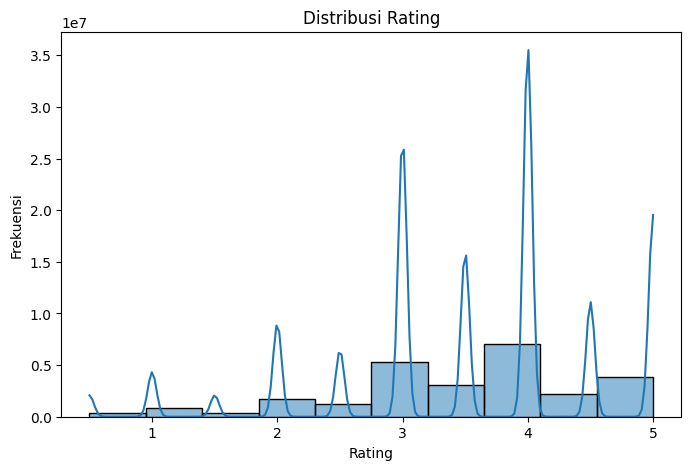

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()


Gambar di atas menunjukkan distribusi atau sebaran penilaian yang diberikan pengguna untuk berbagai film. Dari grafik ini, kita bisa melihat bahwa kebanyakan rating berada di angka 4 dan 5, yang menunjukkan banyak pengguna memberikan nilai tinggi pada film yang ditonton.

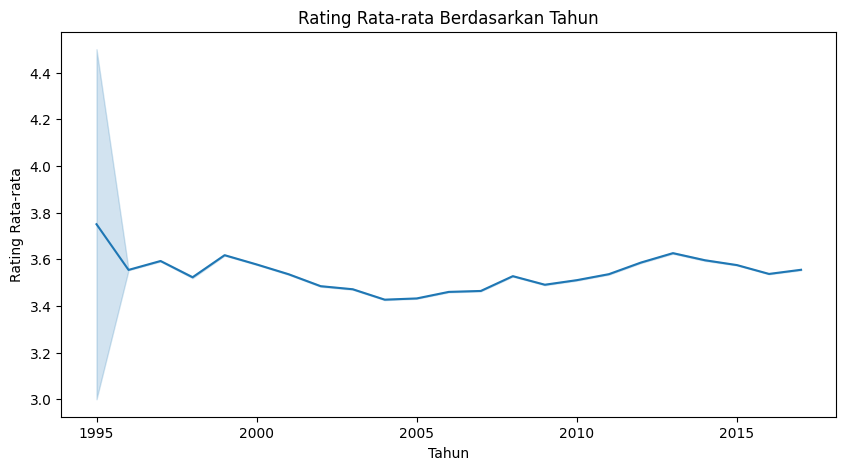

In [ ]:
# Mengonversi timestamp ke datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Plot rating berdasarkan tahun
ratings['year'] = ratings['timestamp'].dt.year
plt.figure(figsize=(10, 5))
sns.lineplot(data=ratings, x='year', y='rating', estimator='mean')
plt.title('Rating Rata-rata Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rating Rata-rata')
plt.show()

Gambar di atas menunjukkan rata-rata penilaian film berdasarkan tahun. Terlihat bahwa rata-rata rating film pada awalnya sangat tinggi, tetapi kemudian mengalami penurunan stabil pada sekitar tahun 2000-an dan tetap relatif konsisten sejak saat itu di sekitar angka 3,5.

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


Output dari `ratings.describe()` menunjukkan ringkasan statistik dasar untuk beberapa kolom numerik dalam dataset `ratings`, yaitu `userId`, `movieId`, `rating`, dan `timestamp`.

- **Count**: Jumlah data yang tidak kosong untuk setiap kolom, yaitu 26,024,290.
- **Mean**: Rata-rata nilai dari setiap kolom.
  - `userId`: 135,037.1
  - `movieId`: 15,849.11
  - `rating`: 3.53
  - `timestamp`: 1,171,258,000
- **Std (Standar Deviasi)**: Penyebaran nilai dalam setiap kolom, menunjukkan variasi data.
  - `userId`: 78,176.2
  - `movieId`: 31,085.26
  - `rating`: 1.07
  - `timestamp`: 205,288,900
- **Min**: Nilai minimum dalam setiap kolom.
  - `userId`: 1
  - `movieId`: 1
  - `rating`: 0.5
  - `timestamp`: 789,652,000
- **25% (Kuartil Pertama)**: 25% dari data memiliki nilai di bawah ini.
  - `userId`: 67,164
  - `movieId`: 1,073
  - `rating`: 3.0
  - `timestamp`: 990,754,500
- **50% (Median)**: Nilai tengah dari data.
  - `userId`: 135,163
  - `movieId`: 2,583
  - `rating`: 3.5
  - `timestamp`: 1,151,716,000
- **75% (Kuartil Ketiga)**: 75% dari data memiliki nilai di bawah ini.
  - `userId`: 202,693
  - `movieId`: 6,503
  - `rating`: 4.0
  - `timestamp`: 1,357,578,000
- **Max**: Nilai maksimum di setiap kolom.
  - `userId`: 270,896
  - `movieId`: 176,275
  - `rating`: 5.0
  - `timestamp`: 1,501,830,000


### ratings_small

In [ ]:
ratings_small

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
# Memeriksa apakah ada missing values di setiap kolom
ratings_small.isnull().sum()


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Output diatas menujukkan tidak adanya *missing values* pada `ratings_small`.

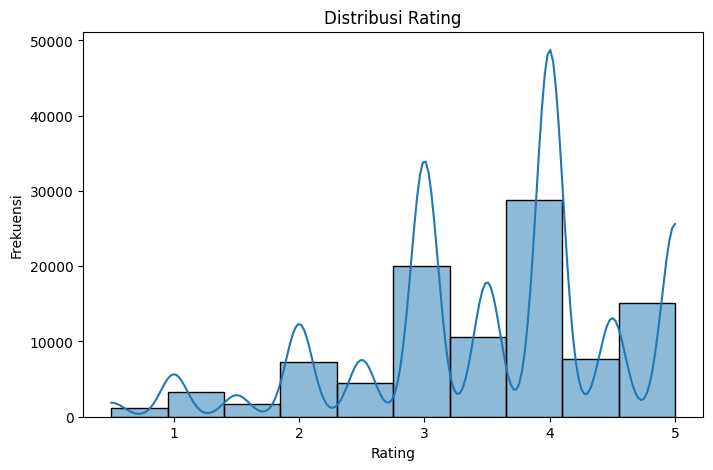

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(ratings_small['rating'], bins=10, kde=True)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()


Gambar di atas menunjukkan distribusi rating yang diberikan pengguna terhadap film. Kebanyakan film mendapatkan rating antara 3 hingga 4, dengan sedikit film yang mendapat rating sangat rendah (1) atau sangat tinggi (5).

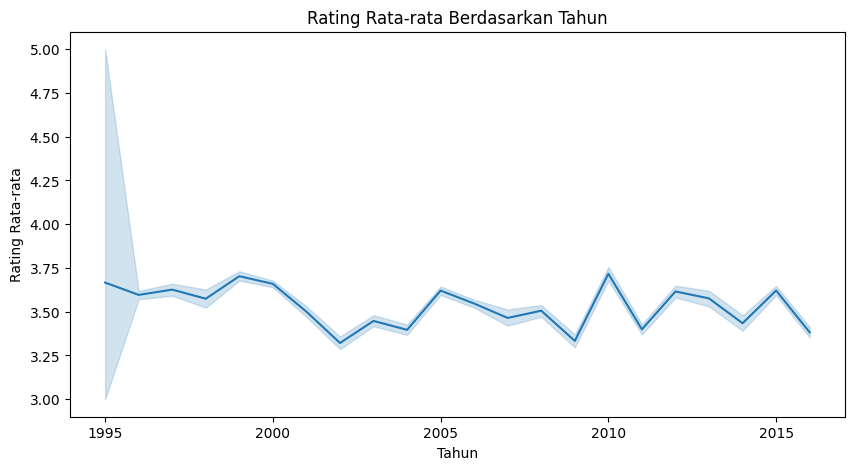

In [ ]:
# Mengonversi timestamp ke datetime
ratings_small['timestamp'] = pd.to_datetime(ratings_small['timestamp'], unit='s')

# Plot rating berdasarkan tahun
ratings_small['year'] = ratings_small['timestamp'].dt.year
plt.figure(figsize=(10, 5))
sns.lineplot(data=ratings_small, x='year', y='rating', estimator='mean')
plt.title('Rating Rata-rata Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rating Rata-rata')
plt.show()

Gambar di atas menunjukkan perubahan rata-rata rating film dari tahun ke tahun, dengan tren yang cenderung stabil pada nilai sekitar 3,5 sejak tahun 2000.

In [ ]:
ratings_small.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


Output dari `ratings_small.describe()` menunjukkan ringkasan statistik dasar untuk beberapa kolom numerik dalam dataset `ratings_small`, yaitu `userId`, `movieId`, `rating`, dan `timestamp`.

- **Count**: Jumlah data yang tidak kosong untuk setiap kolom, yaitu 100,004.
- **Mean**: Rata-rata nilai dari setiap kolom.
  - `userId`: 347.01
  - `movieId`: 12,548.66
  - `rating`: 3.54
  - `timestamp`: 1,129,639,000
- **Std (Standar Deviasi)**: Penyebaran nilai dalam setiap kolom, menunjukkan variasi data.
  - `userId`: 195.16
  - `movieId`: 26,369.20
  - `rating`: 1.06
  - `timestamp`: 191,685,800
- **Min**: Nilai minimum dalam setiap kolom.
  - `userId`: 1
  - `movieId`: 1
  - `rating`: 0.5
  - `timestamp`: 789,652,000
- **25% (Kuartil Pertama)**: 25% dari data memiliki nilai di bawah ini.
  - `userId`: 182
  - `movieId`: 1,028
  - `rating`: 3.0
  - `timestamp`: 965,487,800
- **50% (Median)**: Nilai tengah dari data.
  - `userId`: 367
  - `movieId`: 2,406.5
  - `rating`: 4.0
  - `timestamp`: 1,110,422,000
- **75% (Kuartil Ketiga)**: 75% dari data memiliki nilai di bawah ini.
  - `userId`: 520
  - `movieId`: 5,418
  - `rating`: 4.0
  - `timestamp`: 1,296,192,000
- **Max**: Nilai maksimum di setiap kolom.
  - `userId`: 671
  - `movieId`: 163,949
  - `rating`: 5.0
  - `timestamp`: 1,476,641,000

# Data Preperation

Pada tahap ini dilakukan persiapan data sebelum dilanjutkan ke modeling, yaitu *Data Preprocessing*. Tahap tersebut dilakukan dengan tujuan untuk mempersiapkan data dengan diolah sedemikian rupa untuk dapat dimasukkan ke proses berikutnya. *Data Preprocessing* dilakukan dua bagian untuk dua teknik sistem rekomendasi, untuk CBF dilakukan perubahan tipe data menjadi numerik (`int`), selanjutnya dilakukan ekstraksi pada fitur yang dipilih, setelah di ekstraksi dilakukan penggabungan fitur yang telah diekstraksi menjadi satu fitur. Untuk Collaborative Filtering dilakukan perubahan tipe data dan mengganti nama fiturnya dengan tujuan nantinya akan menggabungkan beberapa fitur dari berkas lain. setelah digabung, dilihat *missing values* jika terdapat maka akan dihapus. Setelah dilakukan pembersihan data pada CBF, berikutnya adalah merubah fitur menjadi representasi numerik dikarenakan dengan representasi numerik ini dapat menggunakan metrik kesamaan seperti cosine similarity untuk menghitung seberapa mirip suatu film dengan film lain berdasarkan `content_features`-nya. Misalnya, dua film dengan genre dan pemeran yang mirip akan memiliki vektor yang relatif serupa, sehingga *similarity* *score*-nya akan tinggi.

## CBF Data Preprocessing

### movies_metadata

Memanggil dataset

In [ ]:
# movies_metadata = pd.read_csv("/content/movie/movies_metadata.csv") # colab
movies_metadata = pd.read_csv("movie/movies_metadata.csv") # lokal

C:\Users\farra\AppData\Local\Temp\ipykernel_26456\560621482.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv("movie/movies_metadata.csv") # lokal


Mengubah tipe data `id` menjadi numerik atau `int`.

In [ ]:
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce').astype('Int64')
print(movies_metadata['id'].dtype)

Int64


Melakukan Ekstraksi Genre

In [ ]:
# Fungsi untuk mengekstrak nama genre
def extract_genres(genre_data):
    if genre_data == '[]':  # Jika genre_data adalah daftar kosong, kembalikan daftar kosong
        return []
    try:
        genres = ast.literal_eval(genre_data)
        return [i['name'] for i in genres if isinstance(i, dict)]
    except (ValueError, SyntaxError):  # Jika terjadi error, kembalikan daftar kosong
        return []

# Terapkan fungsi pada kolom 'genres'
movies_metadata['genres'] = movies_metadata['genres'].apply(extract_genres)

# Melihat beberapa contoh hasil ekstraksi
movies_metadata[['original_title', 'genres']]

,title,genres
0,Toy Story,"[Animation, Comedy, Family]"
1,Jumanji,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Romance, Comedy]"
3,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,[Comedy]
...,...,...
45461,Subdue,"[Drama, Family]"
45462,Century of Birthing,[Drama]
45463,Betrayal,"[Action, Drama, Thriller]"
45464,Satan Triumphant,[]


### credits

Memanggil dataset

In [ ]:
# credits = pd.read_csv("/content/movie/credits.csv")
credits = pd.read_csv("movie/credits.csv")
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


Mengubah tipe data `id` menjadi numerik atau `int`.

In [ ]:
# Konversi kolom 'id' di movies_metadata dan credits menjadi tipe int, lewati error untuk nilai yang tidak bisa dikonversi
credits['id'] = credits['id'].astype('Int64')
print(credits['id'].dtype)

Int64


ekstraksi pemain utama pada fitur `cast` dengan *key* `name` dan sutradara pada fitur `crew` dengan *key* `director`.

In [ ]:
# Fungsi untuk mengambil nama pemeran utama
def get_top_cast(cast_data, top_n=1):
    try:
        cast = ast.literal_eval(cast_data)
        top_cast = [member['name'] for member in cast[:top_n] if isinstance(member, dict)]
        return ', '.join(top_cast)
    except (ValueError, SyntaxError, TypeError):
        return ''

# Fungsi untuk mengambil nama sutradara
def get_director(crew_data):
    try:
        crew = ast.literal_eval(crew_data)
        director = [member['name'] for member in crew if isinstance(member, dict) and member.get('job') == 'Director']
        return director[0] if director else ''
    except (ValueError, SyntaxError, TypeError):
        return ''

# Terapkan fungsi pada kolom 'cast' dan 'crew' di credits
credits['cast'] = credits['cast'].apply(get_top_cast)
credits['director'] = credits['crew'].apply(get_director)

credits = credits.drop(columns=['crew'])

credits[['id', 'cast', 'director']]

,id,cast,director
0,862,Tom Hanks,John Lasseter
1,8844,Robin Williams,Joe Johnston
2,15602,Walter Matthau,Howard Deutch
3,31357,Whitney Houston,Forest Whitaker
4,11862,Steve Martin,Charles Shyer
...,...,...,...
45471,439050,Leila Hatami,Hamid Nematollah
45472,111109,Angel Aquino,Lav Diaz
45473,67758,Erika Eleniak,Mark L. Lester
45474,227506,Iwan Mosschuchin,Yakov Protazanov


### Menggabungkan Data

Menggabungkan kolom genres, cast, dan director menjadi satu fitur baru bernama content_features, di mana daftar `genre` dijadikan string, lalu digabung dengan data `cast` dan `director`.

In [ ]:
# Menggabungkan kolom 'genres', 'cast', dan 'director' menjadi satu fitur bernama content_features
movies_metadata['genres'] = movies_metadata['genres'].apply(lambda x: ' '.join(x))  # Menggabungkan daftar genre menjadi string
movies_metadata['content_features'] = movies_metadata['genres'] + ' ' + credits['cast'] + ' ' + credits['director']

# Melihat beberapa baris pertama dari fitur 'content_features'
movies_metadata[['original_title', 'content_features']].head()

,original_title,content_features
0,Toy Story,Animation Comedy Family Tom Hanks John Lasseter
1,Jumanji,Adventure Fantasy Family Robin Williams Joe Jo...
2,Grumpier Old Men,Romance Comedy Walter Matthau Howard Deutch
3,Waiting to Exhale,Comedy Drama Romance Whitney Houston Forest Wh...
4,Father of the Bride Part II,Comedy Steve Martin Charles Shyer


Output di atas menampilkan fitur baru `content_features` yang sudah digabung berisi `genre`, `cast` (pemain utama), dan `director`

## Collaborative Filtering Data Preprocessing

merubah tipe data `movieId` menjadi numerik atau `int`.

In [ ]:
# Memuat data
ratings_data = pd.read_csv('movie/ratings_small.csv')

# Konversi 'movieId' di ratings_data ke Int64
ratings_data['movieId'] = pd.to_numeric(ratings_data['movieId'], errors='coerce').astype('Int64')

# Menampilkan beberapa baris pertama untuk memastikan data
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Melakukan perubahan nama fitur `id` menjadi `movieId` pada berkas `movies_metadata`, kemudian memilih fitur yang akan digabung ke berkas `ratings` dengan mencocokkan fitur `movidId`.

In [ ]:
# Mengganti nama kolom 'id' di movies_metadata menjadi 'movieId' untuk pencocokan
movies_metadata = movies_metadata.rename(columns={'id': 'movieId'})

# Pilih fitur (movieId, original_title, genres) dari movies_metadata
movies_metadata = movies_metadata[['movieId', 'original_title', 'genres']]

# Gabungkan nama film ke dalam ratings_data berdasarkan movieId
ratings_data = ratings_data.merge(movies_metadata, on='movieId', how='left')

print(ratings_data.head())

   userId movieId  rating   timestamp original_title genres
0       1      31     2.5  1260759144            NaN    NaN
1       1    1029     3.0  1260759179            NaN    NaN
2       1    1061     3.0  1260759182            NaN    NaN
3       1    1129     2.0  1260759185            NaN    NaN
4       1    1172     4.0  1260759205            NaN    NaN


Melihat dataframe di atas terdapat *value* `NaN`, dilakukan pengecekan *missing values*.

In [ ]:
ratings_data.isnull().sum()

userId                0
movieId               0
rating                0
timestamp             0
original_title    55015
genres            55015
dtype: int64

Output di atas menunjukkan terdapat *missing values* pada fitur `original_title` dan `genres` sebanyak 55015 data, maka dari itu dilakukan penghapusan data yang tidak memiliki *value*.

In [ ]:
# Menghapus baris yang memiliki missing values
ratings_data = ratings_data.dropna()

# Mengecek kembali apakah masih ada missing values
ratings_data.isnull().sum()

userId            0
movieId           0
rating            0
timestamp         0
original_title    0
genres            0
dtype: int64

In [ ]:
# Memuat data
ratings_data = pd.read_csv('movie/ratings_small.csv')

# Menampilkan beberapa baris pertama untuk memastikan data
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Melakukan penghapusan fitur `timestamp`

In [ ]:
# Menghapus kolom timestamp
ratings_data = ratings_data.drop(columns=['timestamp'])

data `ratings_data` diolah untuk mempersiapkan model rekomendasi. Langkah pertama adalah membuat daftar *unique* untuk `userId` dan `movieId` serta melakukan *encoding* agar setiap pengguna dan film memiliki representasi angka. Selain itu, rating diubah menjadi tipe data `float`.

In [ ]:
# Mengubah `userId` dan `movieId` menjadi list tanpa nilai yang sama
user_ids = ratings_data['userId'].unique().tolist()
movie_ids = ratings_data['movieId'].unique().tolist()

# Melakukan encoding `userId` dan `movieId`
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Mapping angka kembali ke `userId` dan `movieId`
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

# Pemetaan `userId` dan `movieId` ke dalam kolom `user` dan `movie`
ratings_data['user'] = ratings_data['userId'].map(user_to_user_encoded)
ratings_data['movie'] = ratings_data['movieId'].map(movie_to_movie_encoded)

# Mengubah `rating` menjadi float
ratings_data['rating'] = ratings_data['rating'].astype(np.float32)

# Mendapatkan informasi dasar
num_users = len(user_to_user_encoded)
num_movies = len(movie_to_movie_encoded)
min_rating = ratings_data['rating'].min()
max_rating = ratings_data['rating'].max()

print(f"Number of Users: {num_users}, Number of Movies: {num_movies}, Min Rating: {min_rating}, Max Rating: {max_rating}")

# Shuffle data
ratings_data = ratings_data.sample(frac=1, random_state=42)

# Normalisasi `rating` menjadi rentang 0 hingga 1
ratings_data['rating_normalized'] = ratings_data['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

# Split Data menjadi Training dan Validation (80:20)
x = ratings_data[['user', 'movie']].values
y = ratings_data['rating_normalized'].values

train_indices = int(0.8 * ratings_data.shape[0])
x_train, x_val = x[:train_indices], x[train_indices:]
y_train, y_val = y[:train_indices], y[train_indices:]

Number of Users: 671, Number of Movies: 2830, Min Rating: 0.5, Max Rating: 5.0


*Script* di atas data dirapikan dengan mengacak (shuffle) baris-barisnya, menormalkan nilai rating ke rentang 0 hingga 1, dan membagi dataset menjadi set *training* (80%) dan *validation* (20%).

## TF-IDF untuk CBF

Dilakukan perubahan data pada `content_features` menjadi representasi vektor dengan transformasi menggunakan TF-IDF.

In [ ]:
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform 'content_features' menjadi matriks fitur TF-IDF
tfidf_matrix = tfidf.fit_transform(movies_metadata['content_features'])

# Melihat bentuk matriks TF-IDF untuk memastikan
print("Bentuk matriks TF-IDF:", tfidf_matrix.shape)

Bentuk matriks TF-IDF: (45466, 29142)


Output di atas menghasilkan matriks TF-IDF yang berisi nilai numerik untuk setiap fitur teks. Bentuk matriks (berukuran 45466 baris dan 29142 kolom)

# Modeling

## CBF

langkah-langkah telah dilakukan untuk menyiapkan fitur `content_features` dari data film, kemudian mengubahnya menjadi representasi vektor menggunakan TF-IDF. Representasi vektor ini memungkinkan setiap film memiliki bobot fitur yang dapat dibandingkan satu sama lain.

Melakukan perhitungan kesamaan antar film dilakukan menggunakan `cosine_similarity` dari *library* SKLearn, yang menghasilkan matriks kesamaan di mana setiap nilai di matriks menggambarkan tingkat kemiripan antara satu film dengan film lain berdasarkan `content_features`-nya.

In [ ]:
# Menghitung kesamaan kosinus antar film
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Melihat bentuk matriks kesamaan untuk memastikan
print("Bentuk matriks kesamaan:", cosine_sim.shape)

Bentuk matriks kesamaan: (45466, 45466)


matriks kesamaan ini (cosine_sim) dapat digunakan untuk merekomendasikan film yang mirip dengan film tertentu, dengan mencari film yang memiliki skor kesamaan tertinggi terhadap film tersebut di matriks

### Pengujian

fungsi rekomendasi telah didefinisikan untuk mencari dan menampilkan film yang mirip berdasarkan `content_features`. Fungsi ini pertama-tama mencari indeks film yang diberikan sebagai acuan, menghitung skor kesamaan dengan film lain, dan mengurutkan film berdasarkan skor kesamaan tertinggi.

In [ ]:
# Fungsi rekomendasi menampilkan judul dan content_features
def recommend(original_title, movies_metadata, cosine_sim, top_n=10):
    # Mencari indeks film yang cocok dengan judul
    idx = movies_metadata[movies_metadata['original_title'] == original_title].index[0]

    # Mengambil skor kesamaan untuk film tersebut dan mengurutkannya
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mengambil indeks film yang mirip dengan mengabaikan film itu sendiri (top_n + 1)
    sim_scores = sim_scores[1:top_n + 1]

    # Mendapatkan daftar indeks film
    movie_indices = [i[0] for i in sim_scores]

    # Mendapatkan judul film dan fitur konten untuk setiap rekomendasi
    recommendations = movies_metadata[['original_title', 'content_features']].iloc[movie_indices]

    # Memberikan hasil rekomendasi
    print(f"Rekomendasi untuk '{original_title}':\n")
    for idx, row in recommendations.iterrows():
        print(f"Title: {row['original_title']}\nContent Features: {row['content_features']}\n")

# Contoh penggunaan fungsi rekomendasi
recommend('Toy Story 3', movies_metadata, cosine_sim, top_n=5)

Rekomendasi untuk 'Toy Story 3':

Title: Larry Crowne
Content Features: Comedy Romance Drama Tom Hanks Tom Hanks

Title: Toy Story
Content Features: Animation Comedy Family Tom Hanks John Lasseter

Title: Toy Story 2
Content Features: Animation Comedy Family Tom Hanks John Lasseter

Title: The Legend of Mor'du
Content Features: Animation Family Tom Hanks Steve Purcell

Title: The Polar Express
Content Features: Adventure Animation Family Fantasy Tom Hanks Robert Zemeckis



hasil rekomendasi ditampilkan untuk film "Toy Story 3", menampilkan lima film yang dianggap paling mirip berdasarkan fitur kontennya.

## Collaborative

Melakukan pendefinisian model rekomendasi bernama `RecommenderNet` menggunakan Keras. Model ini memiliki *embedding* layer untuk pengguna (user_embedding dan user_bias) dan film (movie_embedding dan movie_bias), yang memetakan pengguna dan film ke dalam ruang vektor berdimensi tetap, yang akan digunakan untuk menghitung kesamaan.

In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size

        # Embedding layer untuk user
        self.user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)

        # Embedding layer untuk movie
        self.movie_embedding = layers.Embedding(num_movies, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])

        # Menghitung dot product dan menambahkan bias
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        x = dot_user_movie + user_bias + movie_bias

        # Menggunakan sigmoid sebagai activation
        return tf.nn.sigmoid(x)

*Script* di atas, model menerima input pengguna dan film, menghasilkan embedding vektor untuk keduanya, dan menghitung hasil dot product antara vektor pengguna dan film serta menambahkan bias masing-masing. Kemudian hasil tersebut melalui fungsi aktivasi *sigmoid*, yang menormalkan output menjadi nilai antara 0 dan 1, merepresentasikan kemungkinan kecocokan antara pengguna dan film

kemudian Meng-*compile* model dengan menggunakan `binary crossentropy` sebagai fungsi *loss*, `Adam` sebagai *optimizer* dengan `learning rate` sebesar 0.001, serta menggunakan *Root Mean Squared Error* (RMSE) sebagai metrik evaluasi. Dan Melatih model (model.fit) menggunakan data pelatihan (x_train, y_train) selama 15 epoch, dengan batch size 8, dan memvalidasi performa model pada data validasi (x_val, y_val)

In [ ]:
num_users = len(user_to_user_encoded)
num_movies = len(movie_to_movie_encoded)
model = RecommenderNet(num_users, num_movies, embedding_size=50)

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Training model
history = model.fit(
    x_train,
    y_train,
    batch_size=8,
    epochs=15,
    validation_data=(x_val, y_val)
)

Epoch 1/15
4500/4500 [==============================] - 44s 9ms/step - loss: 0.6301 - root_mean_squared_error: 0.2382 - val_loss: 0.6075 - val_root_mean_squared_error: 0.2149
Epoch 2/15
4500/4500 [==============================] - 44s 10ms/step - loss: 0.5997 - root_mean_squared_error: 0.2071 - val_loss: 0.6016 - val_root_mean_squared_error: 0.2087
Epoch 3/15
4500/4500 [==============================] - 42s 9ms/step - loss: 0.5927 - root_mean_squared_error: 0.1997 - val_loss: 0.5993 - val_root_mean_squared_error: 0.2061
Epoch 4/15
4500/4500 [==============================] - 40s 9ms/step - loss: 0.5886 - root_mean_squared_error: 0.1954 - val_loss: 0.5980 - val_root_mean_squared_error: 0.2049
Epoch 5/15
4500/4500 [==============================] - 41s 9ms/step - loss: 0.5863 - root_mean_squared_error: 0.1927 - val_loss: 0.5980 - val_root_mean_squared_error: 0.2049
Epoch 6/15
4500/4500 [==============================] - 38s 9ms/step - loss: 0.5848 - root_mean_squared_error: 0.1910 - val_

### Pengujian

*Script* di bawah mendefinisikan fungsi untuk merekomendasikan film berdasarkan data film yang telah ditonton oleh pengguna dan data rating. Fungsi ini bekerja dengan langkah-langkah berikut:

1. **Mengidentifikasi Film yang Sudah Ditonton**  
   Fungsi ini mengidentifikasi film yang telah ditonton oleh pengguna tertentu berdasarkan `user_id`.

2. **Menyaring Film yang Belum Ditonton**  
   Menyaring film yang belum ditonton dari seluruh koleksi film, sehingga hanya film yang belum ditonton oleh pengguna yang dipertimbangkan untuk rekomendasi.

3. **Meng-encode Film yang Belum Ditonton**  
   Encode film yang belum ditonton menggunakan indeks yang dipakai di model, kemudian siapkan input bagi model untuk prediksi skor.

4. **Prediksi Skor Film yang Belum Ditonton**  
   Menggunakan model untuk memprediksi skor film yang belum ditonton dan menyeleksi skor tertinggi sebagai rekomendasi.

5. **Memilih Film dengan Skor Tertinggi untuk Rekomendasi**  
   Mengambil beberapa film dengan skor tertinggi sebagai rekomendasi untuk pengguna.

6. **Menampilkan Hasil Rekomendasi**  
   - **Top 5 Film dengan Rating Tertinggi**: Menampilkan lima film dengan rating tertinggi yang pernah diberikan oleh pengguna untuk mengetahui preferensi pengguna.
   - **Rekomendasi untuk User**: Menampilkan sepuluh rekomendasi film dengan skor prediksi tertinggi untuk pengguna yang dihasilkan oleh model.

Fungsi ini dapat dipanggil untuk merekomendasikan film kepada pengguna tertentu atau pengguna acak dari dataset.


In [ ]:
def recommend_movies_for_user(user_id, model, ratings_data, movie_encoded_to_movie, top_n=10):
    # Ambil film yang sudah ditonton oleh user
    movies_watched_by_user = ratings_data[ratings_data['userId'] == user_id]['movieId'].values

    # Dapatkan semua movieId unik dalam dataset
    all_movie_ids = ratings_data['movieId'].unique()

    # Tentukan film yang belum ditonton oleh user
    movies_not_watched = np.setdiff1d(all_movie_ids, movies_watched_by_user)

    # Encode movie_not_watched sesuai dengan indeks yang digunakan di model
    movies_not_watched_encoded = [movie_to_movie_encoded.get(movie) for movie in movies_not_watched if movie in movie_to_movie_encoded]

    # Buat array input dengan user_id yang di-encode dan movie_id yang belum ditonton
    user_encoded = user_to_user_encoded[user_id]
    user_movie_array = np.hstack(([[user_encoded]] * len(movies_not_watched_encoded), np.array(movies_not_watched_encoded).reshape(-1, 1)))

    # Prediksi skor untuk film yang belum ditonton
    ratings_pred = model.predict(user_movie_array).flatten()

    # Ambil film dengan prediksi skor tertinggi
    top_ratings_indices = ratings_pred.argsort()[-top_n:][::-1]
    recommended_movie_ids = [movie_encoded_to_movie[movies_not_watched_encoded[i]] for i in top_ratings_indices]

    # Tampilkan Top 5 Film dengan Rating Tertinggi yang Diberikan User
    top_rated_movies = ratings_data[ratings_data['userId'] == user_id].sort_values(by='rating', ascending=False).head(5)
    print(f"Top 5 Film dengan Rating Tertinggi yang Diberikan oleh User {user_id}:")
    for idx, row in top_rated_movies.iterrows():
        print(f"{row['movieId']}. {row['original_title']} (Rating: {row['rating']}, Genre: {row['genres']})")

    # Tampilkan rekomendasi
    print(f"\nRekomendasi untuk User ID {user_id}:\n")
    for idx, movie_id in enumerate(recommended_movie_ids):
        movie_info = ratings_data[ratings_data['movieId'] == movie_id].iloc[0]
        print(f"{idx + 1}. {movie_info['original_title']} (Movie ID: {movie_id}, Genre: {movie_info['genres']})")

# Contoh penggunaan fungsi rekomendasi untuk user tertentu
random_user_id = ratings_data['userId'].sample(1).iloc[0]
recommend_movies_for_user(random_user_id, model, ratings_data, movie_encoded_to_movie, top_n=10)

88/88 [==============================] - 0s 4ms/step
Top 5 Film dengan Rating Tertinggi yang Diberikan oleh User 132:
46578. The Great American Girl Robbery (Rating: 5.0, Genre: ['Comedy', 'Crime'])
3083. Mr. Smith Goes to Washington (Rating: 5.0, Genre: ['Comedy', 'Drama'])
8012. Get Shorty (Rating: 5.0, Genre: ['Comedy', 'Thriller', 'Crime'])
4979. Montag kommen die Fenster (Rating: 5.0, Genre: ['Drama'])
30810. Olga's House of Shame (Rating: 5.0, Genre: ['Crime', 'Drama'])

Rekomendasi untuk User ID 132:

1. Leiutajateküla Lotte (Movie ID: 1260, Genre: ['Adventure', 'Animation', 'Comedy', 'Family'])
2. Lonely Hearts (Movie ID: 1252, Genre: ['Drama', 'Thriller', 'Crime', 'Romance'])
3. Wuthering Heights (Movie ID: 98491, Genre: ['Drama', 'Romance'])
4. The Million Dollar Hotel (Movie ID: 318, Genre: ['Drama', 'Thriller'])
5. Hannibal Rising (Movie ID: 1248, Genre: ['Crime', 'Drama', 'Thriller'])
6. The Talented Mr. Ripley (Movie ID: 1213, Genre: ['Thriller', 'Crime', 'Drama'])
7. 빈집 

Output diatas merupakan hasil dari model sistem rekomendasi dengan teknik Collaborative Filtering, ditampilkan data user dengan 5 teratas *rating* oleh User ID 132 dan hasil rekomendasi untuk User ID 132.

# Evaluasi

## Content-Based Filtering

Metrik yang digunakan untuk mengukur performa model CBF adalah precision (didapat dari forum diskusi), berikut formulanya:

$Precision = \frac{RekomendasiYangRelevan}{TotalItemYangdiRekomendasikan}$<br>

Metrik Precision pada sistem rekomendasi mengukur seberapa akurat rekomendasi yang diberikan dengan hanya mempertimbangkan item yang relevan untuk pengguna. Rumusnya adalah rasio antara jumlah rekomendasi yang relevan terhadap total item yang direkomendasikan. Dengan kata lain, precision menunjukkan seberapa besar proporsi dari item yang direkomendasikan yang benar-benar relevan bagi pengguna.

Mengambil hasil pengujian CBF sebelumnya yaitu:

Rekomendasi untuk 'Toy Story 3':<br>

Title: Larry Crowne<br>
Content Features: Comedy Romance Drama Tom Hanks Tom Hanks

Title: Toy Story<br>
Content Features: Animation Comedy Family Tom Hanks John Lasseter

Title: Toy Story 2<br>
Content Features: Animation Comedy Family Tom Hanks John Lasseter

Title: The Legend of Mor'du<br>
Content Features: Animation Family Tom Hanks Steve Purcell

Title: The Polar Express<br>
Content Features: Adventure Animation Family Fantasy Tom Hanks Robert Zemeckis

Hasil diatas akan diuji genrenya:

Larry Crowne - Comedy Romance Drama (Tidak relevan, genre berbeda)<br>
Toy Story - Animation Comedy Family (Relevan, merupakan film dalam seri yang sama)<br>
Toy Story 2 - Animation Comedy Family (Relevan, merupakan film dalam seri yang sama)<br>
The Legend of Mor'du - Animation Family (Relevan, genre mirip dan memiliki elemen animasi keluarga)<br>
The Polar Express - Adventure Animation Family Fantasy (Relevan, genre mirip dengan elemen animasi dan keluarga)<br>

Pernyataan hasil genre diatas dapat dimasukkan ke formula sebagai berikut:

$Precision = \frac{RekomendasiYangRelevan}{TotalItemYangdiRekomendasikan} = \frac{4}{5} = {0.8}$<br>

Hasil *precision* yang didapat adalah 0.8 atau 80% jika menghitung dari genrenya.

## Collaborative Filtering

Berdasarkan model *machine learning* yang sudah dibangun menggunakan *embedding layer* dengan `Adam` sebagai *optimizer* dan *binary crossentropy loss function*, metrik yang digunakan adalah *Root Mean Squared Error* (RMSE). Perhitungan RMSE dapat dilakukan menggunakan rumus berikut:

$RMSE=\sqrt{\sum^{n}_{i=1} \frac{y_i - y\\_pred_i}{n}}$

Di mana, nilai $n$ merupakan jumlah *dataset*, nilai $y_i$ adalah nilai sebenarnya, dan $y\\_pred$ yaitu nilai prediksinya terdahap $i$ sebagai urutan data dalam *dataset*.

Metrik di atas cara bekerjanya seperti dibawah ini:
Formula **Root Mean Squared Error (RMSE)** mengukur seberapa dekat prediksi model dengan nilai sebenarnya. Langkah-langkah kerjanya adalah sebagai berikut:

1. **Menghitung Selisih Setiap Pasangan Nilai**  
   Untuk setiap pasangan nilai aktual $y_i$ dan nilai prediksi $y\_pred_i$, hitung selisihnya $y_i - y\_pred_i$. Ini menunjukkan seberapa jauh prediksi dari nilai aktual.

2. **Mengkuadratkan Selisih**  
   Kuadratkan setiap selisih $(y_i - y\_pred_i)^2$ untuk memastikan semua nilai positif dan memberikan penalti lebih besar pada kesalahan yang lebih besar.

3. **Menjumlahkan Semua Selisih Kuadrat**  
   Jumlahkan semua nilai selisih kuadrat dari setiap pasangan nilai dalam dataset.

4. **Menghitung Nilai Rata-Rata**  
   Bagi jumlah total selisih kuadrat dengan jumlah data $n$ untuk mendapatkan rata-rata kesalahan kuadrat.

5. **Mengambil Akar Kuadrat dari Rata-Rata**  
   Terakhir, ambil akar kuadrat dari rata-rata kesalahan kuadrat untuk mendapatkan nilai RMSE.

Semakin kecil nilai RMSE, semakin baik kinerja model, karena prediksi mendekati nilai observasi atau nilai sebenarnya.

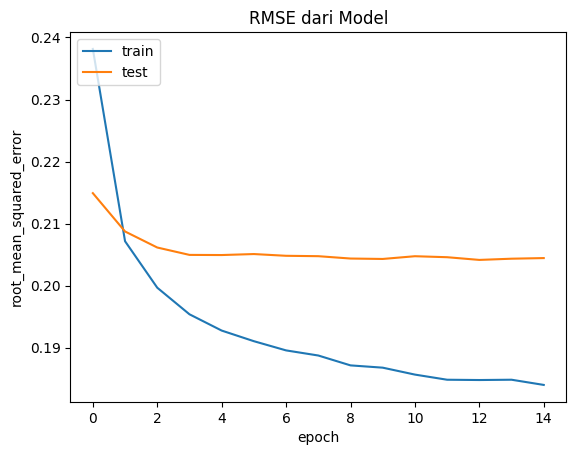

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('RMSE dari Model')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Visualisasi di atas menunjukkan penurunan Root Mean Squared Error (RMSE) pada data pelatihan dan data validasi selama 15 epoch. Grafik memperlihatkan bahwa error pada data pelatihan terus menurun, sementara error pada data validasi awalnya menurun namun kemudian stabil, yang menunjukkan bahwa model belajar dari data dengan cukup baik tanpa overfitting.